## Linear Regression  to predict Total Medals for top 25 countries
---

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

### Top 25 countries that won most medals
---

In [2]:
top_df = pd.read_csv('top_25.csv')
print(top_df.shape)
top_df.head()

(25, 9)


,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals
0,USA,4,10362,565,4341,1035,802,707,2544
1,Russia,1,6323,404,3191,592,498,487,1577
2,Germany,2,8471,510,3766,442,457,490,1389
3,UK,3,7634,525,3665,278,316,298,892
4,France,2,7023,540,3479,233,255,282,770


In [3]:
# Assigning Id to each Country
top_df['CountryId'] = [(x+1) for x in range(25)]

print(top_df.shape)
top_df.head()

(25, 10)


,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,CountryId
0,USA,4,10362,565,4341,1035,802,707,2544,1
1,Russia,1,6323,404,3191,592,498,487,1577,2
2,Germany,2,8471,510,3766,442,457,490,1389,3
3,UK,3,7634,525,3665,278,316,298,892,4
4,France,2,7023,540,3479,233,255,282,770,5


In [4]:
top_df = top_df[['Country', 'CountryId']]
print(top_df.shape)
top_df.head()

(25, 2)


,Country,CountryId
0,USA,1
1,Russia,2
2,Germany,3
3,UK,4
4,France,5


### Summer Olympic data with athlete, sports, evnets and medals count
---

In [5]:
df = pd.read_csv('summer_athlete_medals_count.csv')
print(df.shape)
df.head()

(2790, 10)


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals
0,1896,Greece,1,102,9,39,10,17,17,44
1,1896,USA,0,14,3,16,11,6,2,19
2,1896,Germany,0,19,6,27,7,5,2,14
3,1896,France,0,12,6,18,5,4,2,11
4,1896,UK,0,10,7,19,3,3,3,9


In [6]:
# Adding country_id column to summer df
df = pd.merge(df,top_df, how = 'left', on = 'Country')
print(df.shape)
df.head()

(2790, 11)


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,CountryId
0,1896,Greece,1,102,9,39,10,17,17,44,25.0
1,1896,USA,0,14,3,16,11,6,2,19,1.0
2,1896,Germany,0,19,6,27,7,5,2,14,3.0
3,1896,France,0,12,6,18,5,4,2,11,5.0
4,1896,UK,0,10,7,19,3,3,3,9,4.0


In [7]:
# Dropping the countries that are not top 25
df = df.dropna()
print(df.shape)
df.head()

(634, 11)


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,CountryId
0,1896,Greece,1,102,9,39,10,17,17,44,25.0
1,1896,USA,0,14,3,16,11,6,2,19,1.0
2,1896,Germany,0,19,6,27,7,5,2,14,3.0
3,1896,France,0,12,6,18,5,4,2,11,5.0
4,1896,UK,0,10,7,19,3,3,3,9,4.0


In [8]:
df['Athletes per event'] = round(df['Athletes']/df['Events'], 2)
print(df.shape)
df.head()

(634, 12)


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,CountryId,Athletes per event
0,1896,Greece,1,102,9,39,10,17,17,44,25.0,2.62
1,1896,USA,0,14,3,16,11,6,2,19,1.0,0.88
2,1896,Germany,0,19,6,27,7,5,2,14,3.0,0.70
3,1896,France,0,12,6,18,5,4,2,11,5.0,0.67
4,1896,UK,0,10,7,19,3,3,3,9,4.0,0.53


In [10]:
df = df.drop(['Gold', 'Silver','Bronze'], axis =1)
print(df.shape)
df.head()

(634, 9)


,Year,Country,Host,Athletes,Sports,Events,Medals,CountryId,Athletes per event
0,1896,Greece,1,102,9,39,44,25.0,2.62
1,1896,USA,0,14,3,16,19,1.0,0.88
2,1896,Germany,0,19,6,27,14,3.0,0.70
3,1896,France,0,12,6,18,11,5.0,0.67
4,1896,UK,0,10,7,19,9,4.0,0.53


In [11]:
# Bring 'CountryId' column to the front
col = df.pop('CountryId')
df.insert(0,'CountryId', col)

print(df.shape)
df.head()

(634, 9)


,CountryId,Year,Country,Host,Athletes,Sports,Events,Medals,Athletes per event
0,25.0,1896,Greece,1,102,9,39,44,2.62
1,1.0,1896,USA,0,14,3,16,19,0.88
2,3.0,1896,Germany,0,19,6,27,14,0.70
3,5.0,1896,France,0,12,6,18,11,0.67
4,4.0,1896,UK,0,10,7,19,9,0.53


In [12]:
df = df.sort_values(['Year', 'Medals', 'Country'], ascending = [True, False, True])
print(df.shape)
df.head()

(634, 9)


,CountryId,Year,Country,Host,Athletes,Sports,Events,Medals,Athletes per event
0,25.0,1896,Greece,1,102,9,39,44,2.62
1,1.0,1896,USA,0,14,3,16,19,0.88
2,3.0,1896,Germany,0,19,6,27,14,0.70
3,5.0,1896,France,0,12,6,18,11,0.67
4,4.0,1896,UK,0,10,7,19,9,0.53


In [13]:
df = pd.get_dummies(df, columns = ['Country'])
print(df.shape)
df.head()

(634, 33)


,CountryId,Year,Host,Athletes,Sports,Events,Medals,Athletes per event,Country_Australia,Country_Belgium,...,Country_Netherlands,Country_Norway,Country_Poland,Country_Romania,Country_Russia,Country_South Korea,Country_Sweden,Country_Switzerland,Country_UK,Country_USA
0,25.0,1896,1,102,9,39,44,2.62,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1896,0,14,3,16,19,0.88,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3.0,1896,0,19,6,27,14,0.70,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.0,1896,0,12,6,18,11,0.67,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,1896,0,10,7,19,9,0.53,0,0,...,0,0,0,0,0,0,0,0,1,0


## Predicting medals for 2016
---

In [14]:
predict_year = 2016

#### Train data
---

In [15]:
train_df = df[df['Year'] < predict_year]
print(train_df.shape)
train_df

(609, 33)


,CountryId,Year,Host,Athletes,Sports,Events,Medals,Athletes per event,Country_Australia,Country_Belgium,...,Country_Netherlands,Country_Norway,Country_Poland,Country_Romania,Country_Russia,Country_South Korea,Country_Sweden,Country_Switzerland,Country_UK,Country_USA
0,25.0,1896,1,102,9,39,44,2.62,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1896,0,14,3,16,19,0.88,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3.0,1896,0,19,6,27,14,0.70,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.0,1896,0,12,6,18,11,0.67,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,1896,0,10,7,19,9,0.53,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,21.0,2012,0,98,19,71,4,1.38,0,0,...,0,0,0,0,0,0,0,1,0,0
2429,23.0,2012,0,111,16,71,3,1.56,0,1,...,0,0,0,0,0,0,0,0,0,0
2430,12.0,2012,0,56,14,61,3,0.92,0,0,...,0,0,0,0,0,0,0,0,0,0
2434,18.0,2012,0,63,17,56,2,1.12,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X = train_df.drop(['Medals'], axis=1)
y = train_df['Medals'].values.reshape(-1, 1)
print(X.shape, y.shape)

(609, 32) (609, 1)


#### Test data
---

In [17]:
test_df = df[df['Year'] == predict_year].sort_values(['CountryId'])
print(test_df.shape)
test_df.head()

(25, 33)


,CountryId,Year,Host,Athletes,Sports,Events,Medals,Athletes per event,Country_Australia,Country_Belgium,...,Country_Netherlands,Country_Norway,Country_Poland,Country_Romania,Country_Russia,Country_South Korea,Country_Sweden,Country_Switzerland,Country_UK,Country_USA
2584,1.0,2016,0,555,33,245,121,2.27,0,0,...,0,0,0,0,0,0,0,0,0,1
2587,2.0,2016,0,284,29,181,56,1.57,0,0,...,0,0,0,0,1,0,0,0,0,0
2589,3.0,2016,0,418,29,217,42,1.93,0,0,...,0,0,0,0,0,0,0,0,0,0
2586,4.0,2016,0,360,26,198,67,1.82,0,0,...,0,0,0,0,0,0,0,0,1,0
2588,5.0,2016,0,392,32,202,42,1.94,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
test_data = test_df.drop(['Medals'], axis = 1).reset_index(drop=True)
print(test_data.shape)
test_data.head()

(25, 32)


,CountryId,Year,Host,Athletes,Sports,Events,Athletes per event,Country_Australia,Country_Belgium,Country_Bulgaria,...,Country_Netherlands,Country_Norway,Country_Poland,Country_Romania,Country_Russia,Country_South Korea,Country_Sweden,Country_Switzerland,Country_UK,Country_USA
0,1.0,2016,0,555,33,245,2.27,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.0,2016,0,284,29,181,1.57,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3.0,2016,0,418,29,217,1.93,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,2016,0,360,26,198,1.82,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5.0,2016,0,392,32,202,1.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
top_df['Medals'] = test_df['Medals'].reset_index(drop=True)
print(top_df.shape)
top_df.head()

(25, 3)


,Country,CountryId,Medals
0,USA,1,121
1,Russia,2,56
2,Germany,3,42
3,UK,4,67
4,France,5,42


## Linear Regression Model
---

#### Test Train Split & Standard Scaler
---

In [20]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [21]:
print(X_train.shape, y_train.shape, X_test.shape,  y_test.shape)

(456, 32) (456, 1) (153, 32) (153, 1)


In [22]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

#### Fit the model to the training data and calculate the scores for the training and testing data

In [23]:
model1.fit(X_train, y_train)

training_score = model1.score(X_train, y_train)
testing_score = model1.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8213679929762889
Testing Score: 0.8037830913145319


Text(0.5, 1.0, 'Residual Plot')

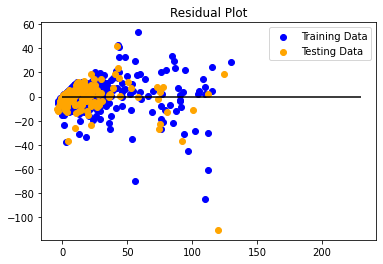

In [24]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model1.predict(X_train), model1.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model1.predict(X_test), model1.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

### Using model1 to predict medals for test_data
---

In [25]:
lg_predictions = model1.predict(test_data)
lg_predictions = np.ravel(lg_predictions)
lg_predictions

array([108.3783493 ,  65.13868713,  59.11585999,  36.75942993,
        40.5763092 ,  30.94537354,  55.83804321,  44.32154846,
        12.43831635,  14.33215332,  32.78817749,   3.63819122,
        21.07048035,  11.34088898,  19.20762634,  18.69128418,
        15.84806061,   1.61233521,   6.06117249,   8.32733154,
         4.43509674,  -0.28639221,   2.37711334,   1.51728821,
         0.8276825 ])

In [26]:
lg_predictions = np.around(lg_predictions, decimals =0)
lg_predictions

array([108.,  65.,  59.,  37.,  41.,  31.,  56.,  44.,  12.,  14.,  33.,
         4.,  21.,  11.,  19.,  19.,  16.,   2.,   6.,   8.,   4.,  -0.,
         2.,   2.,   1.])

In [27]:
top_df['Predicted'] = lg_predictions.astype(int)
top_df = top_df.rename(columns={'Medals': 'Actual'})
top_df

,Country,CountryId,Actual,Predicted
0,USA,1,121,108
1,Russia,2,56,65
2,Germany,3,42,59
3,UK,4,67,37
4,France,5,42,41
5,Italy,6,28,31
6,China,7,70,56
7,Australia,8,29,44
8,Sweden,9,11,12
9,Hungary,10,15,14


In [28]:
top_df['Error'] = top_df['Predicted'] - top_df['Actual']
top_df

,Country,CountryId,Actual,Predicted,Error
0,USA,1,121,108,-13
1,Russia,2,56,65,9
2,Germany,3,42,59,17
3,UK,4,67,37,-30
4,France,5,42,41,-1
5,Italy,6,28,31,3
6,China,7,70,56,-14
7,Australia,8,29,44,15
8,Sweden,9,11,12,1
9,Hungary,10,15,14,-1


In [29]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(top_df['Actual'], lg_predictions)
r2 = model1.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 92.52, R2: 0.8037830913145319


### Plot Residuals
---

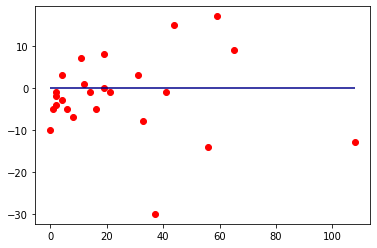

In [30]:
y = top_df['Actual']
plt.scatter(lg_predictions, lg_predictions - y, c = 'red')

plt.hlines(y=0, xmin=lg_predictions.min(), xmax=lg_predictions.max(), colors ="darkblue")
plt.show()